In [31]:
import os
import pandas as pd
from tbparse import SummaryReader
import matplotlib.pyplot as plt
import numpy as np

base = r"..\..\data"

def read_tb(base, filename):
    reader = SummaryReader(os.path.join(base, filename))
    df = reader.scalars
    return df

def get_data_array(df, tag):
    return df[df.tag.str.contains(tag)]['value'].to_numpy().squeeze()

def filter_df(df):
    return get_data_array(df, 'Eval_AverageReturn'), get_data_array(df, 'Eval_StdReturn')

## Part 1: Q learning

The first phase of the assignment is to implement a working version of Q-learning. The default code will run the Ms. Pac-Man game with reasonable hyperparameter settings.

You may want to look inside infrastructure/dqn utils.py to understand how the (memory-optimized) replay buffer works, but you will not need to modify it.

### Question 1: basic Q-learning performance (DQN)

#### LunarLander-v3 (optional)

To accelerate debugging, you may also test on LunarLander-v3.

Our reference solution with the default hyperparameters achieves around 150 reward after 350k timesteps, but there is considerable variation between runs and without the double-Q trick the average return often decreases after reaching 150.


```bash
python cs285/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --exp_name q1
```

Data put in `q1_LunarLander-v3_06-10-2022_12-16-15`.

In [14]:
q1_ll = read_tb(base, 'q1_LunarLander-v3_06-10-2022_12-16-15');
print(q1_ll['tag'].unique())

['TimeSinceStart' 'Train_AverageReturn' 'Train_BestReturn'
 'Train_EnvstepsSoFar' 'Training_Loss']


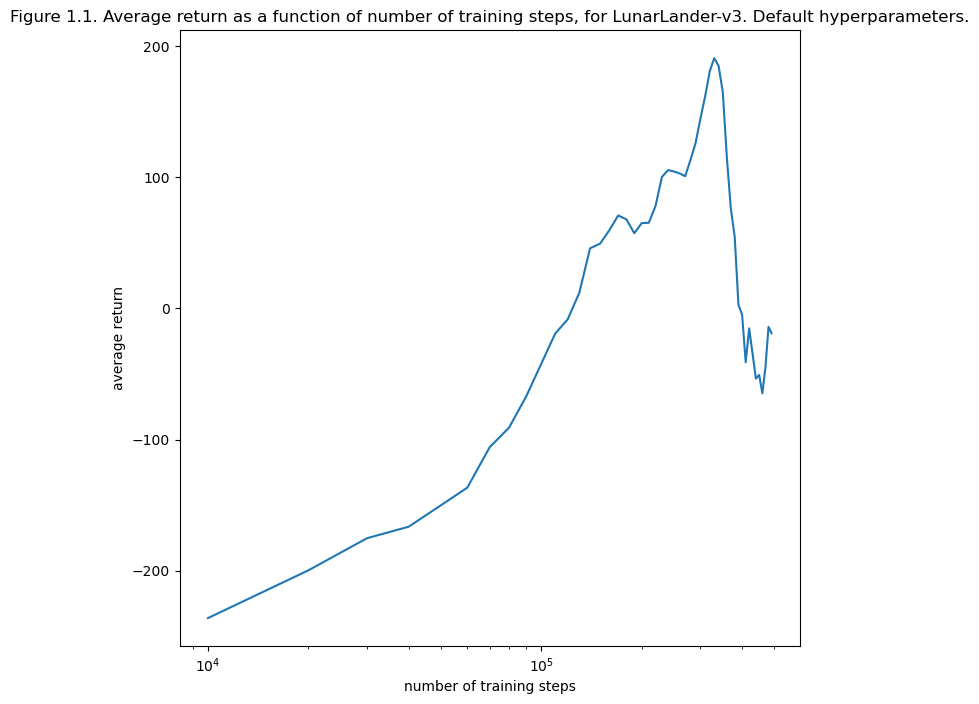

In [26]:
xs = []
ys = []
y_bests = []
yerrs = []
for df in [q1_ll]:
    xs.append(get_data_array(df, 'Train_EnvstepsSoFar'))
    ys.append(get_data_array(df, 'Train_AverageReturn'))
    y_bests.append(get_data_array(df, 'Train_BestReturn'))
#     yerrs.append(get_data_array(df, 'Eval_StdReturn'))
    
plt.figure(figsize=(8, 8))
# plt.errorbar(xs, ys, yerr=yerrs)
plt.plot(xs[0][1:], ys[0])
plt.xscale('log')
plt.xlabel('number of training steps')
plt.ylabel('average return')
plt.title("Figure 1.1. Average return as a function of number of training steps, for LunarLander-v3. Default hyperparameters.")
plt.show()

#### MsPacman-v0

Run it with the default hyperparameters on the Ms. Pac-Man game for 1 million steps using the command below. Our reference solution gets a return of 1500 in this timeframe. On Colab, this will take roughly 3 GPU hours. 


```bash
python cs285/scripts/run_hw3_dqn.py --env_name MsPacman-v0 --exp_name q1
```

Data in `q1_MsPacman-v0_06-10-2022_00-43-20`. Left it running overnight, and it accidentally ran for over 3.7 million steps. 1 million steps took about 2 hours on my laptop. The training curve has two phases: 

* Phase 1: fast learning in the first 1 million steps, reaching 1600 (average training reward).
* Phase 2: slow learning in the next 1.4 million steps, reaching 1850.
* Phase 3: plateau between 1650 and 1850.

Include a learning curve plot showing the performance of your implementation on Ms. Pac-Man. The x-axis should correspond to number of time steps and the y-axis should show the average per-epoch reward as well as the best mean reward so far. Be sure to label the y-axis, since we need to verify that your implementation achieves similar reward as ours.

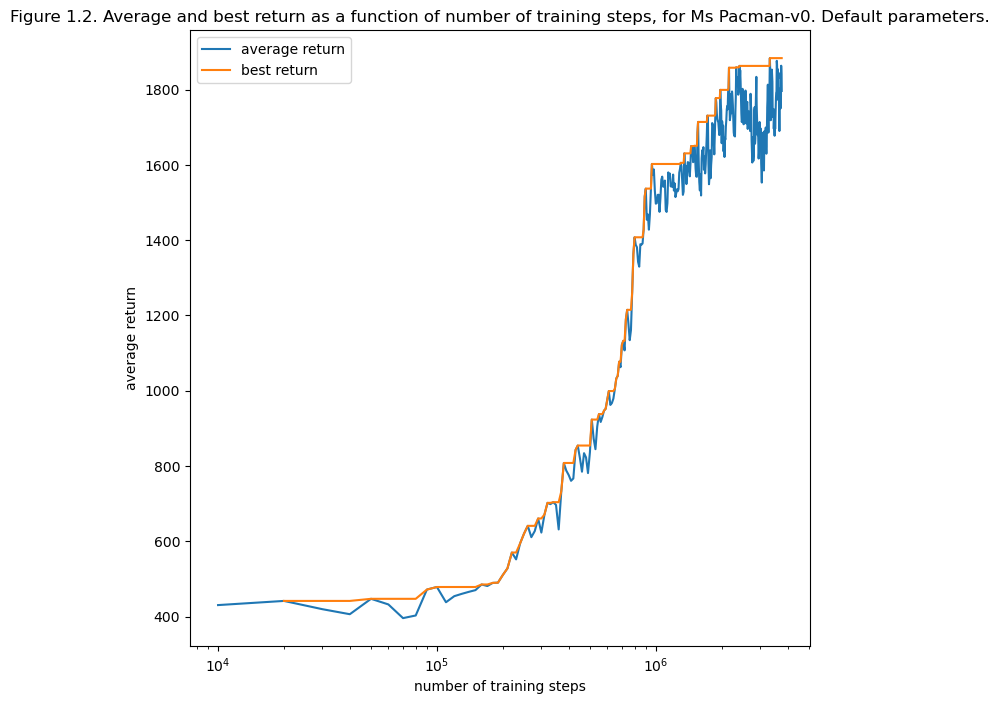

In [32]:
q1_mp = read_tb(base, 'q1_MsPacman-v0_06-10-2022_00-43-20');

xs = []
ys = []
y_bests = []
yerrs = []
for df in [q1_mp]:
    xs.append(get_data_array(df, 'Train_EnvstepsSoFar'))
    ys.append(get_data_array(df, 'Train_AverageReturn'))
    y_bests.append(get_data_array(df, 'Train_BestReturn'))
#     yerrs.append(get_data_array(df, 'Eval_StdReturn'))
    
plt.figure(figsize=(8, 8))
# plt.errorbar(xs, ys, yerr=yerrs)
plt.plot(xs[0][1:], ys[0], label="average return")
plt.plot(xs[0][2:], y_bests[0], label="best return")
plt.xscale('log')
plt.xlabel('number of training steps')
plt.ylabel('average return')
plt.legend()
plt.title("Figure 1.2. Average and best return as a function of number of training steps, for Ms Pacman-v0. Default parameters.")
plt.show()

### Question 2: double Q-learning (DDQN)

Use the double estimator to improve the accuracy of your learned Q values. This amounts to using the online Q network (instead of the target Q network) to select the best action when computing target values. Compare the performance of DDQN to vanilla DQN. Since there is considerable variance between runs, you must run at least three random seeds for both DQN and DDQN. You may use LunarLander-v3 for this question.

```bash
python cs285/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --exp_name q2_dqn_1 --seed 1
python cs285/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --exp_name q2_dqn_2 --seed 2
python cs285/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --exp_name q2_dqn_3 --seed 3
python cs285/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --exp_name q2_doubledqn_1 --double_q --seed 1
python cs285/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --exp_name q2_doubledqn_2 --double_q --seed 2
python cs285/scripts/run_hw3_dqn.py --env_name LunarLander-v3 --exp_name q2_doubledqn_3 --double_q --seed 3
```

Data put in

```
q2_dqn_1_LunarLander-v3_15-10-2022_16-43-20
q2_dqn_2_LunarLander-v3_15-10-2022_16-43-20
q2_dqn_3_LunarLander-v3_15-10-2022_16-43-20
q2_doubledqn_1_LunarLander-v3_15-10-2022_16-43-20
q2_doubledqn_2_LunarLander-v3_15-10-2022_16-43-20
q2_doubledqn_3_LunarLander-v3_15-10-2022_16-43-20
```

make a single graph that averages the performance across three runs for both DQN and double DQN. See `scripts/read results.py` for an example of how to read the evaluation returns from Tensorboard logs.


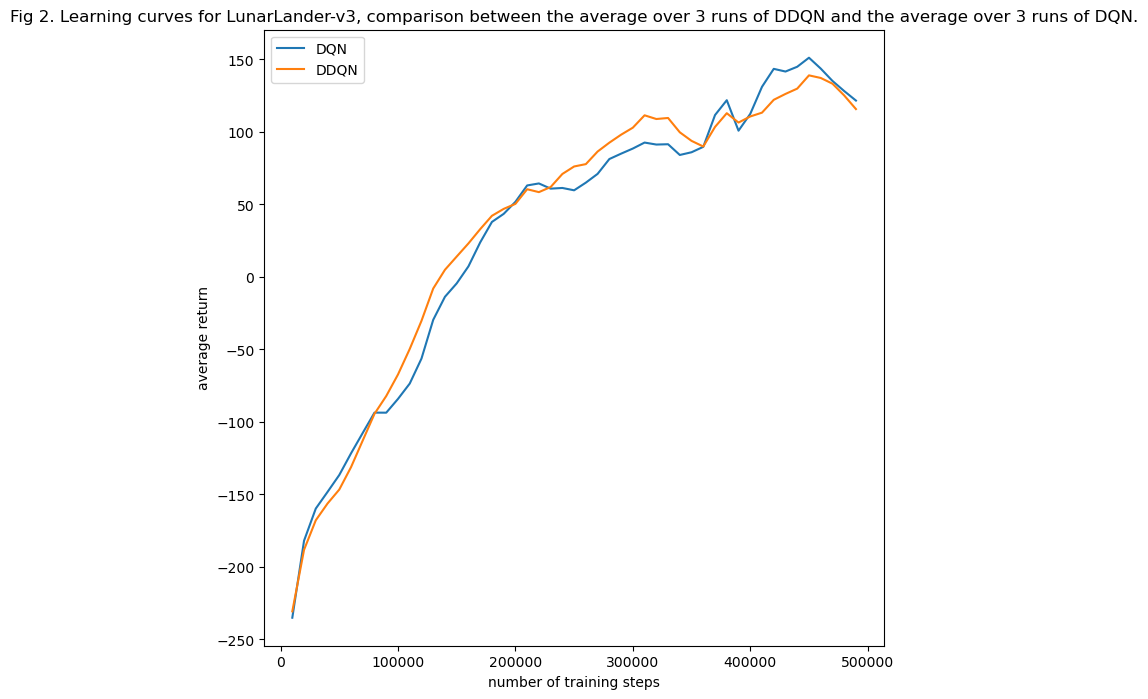

In [27]:
q2_dqn_1 = read_tb(base, 'q2_dqn_1_LunarLander-v3_15-10-2022_16-43-20');
q2_dqn_2 = read_tb(base, 'q2_dqn_2_LunarLander-v3_15-10-2022_16-43-20');
q2_dqn_3 = read_tb(base, 'q2_dqn_3_LunarLander-v3_15-10-2022_16-43-20');
q2_ddqn_1 = read_tb(base, 'q2_doubledqn_1_LunarLander-v3_15-10-2022_16-43-20');
q2_ddqn_2 = read_tb(base, 'q2_doubledqn_2_LunarLander-v3_15-10-2022_16-43-20');
q2_ddqn_3 = read_tb(base, 'q2_doubledqn_3_LunarLander-v3_15-10-2022_16-43-20');
q2_dqn = [q2_dqn_1, q2_dqn_2, q2_dqn_3]
q2_ddqn = [q2_ddqn_1, q2_ddqn_2, q2_ddqn_3]

xs = []
ys = []
y_bests = []
yerrs = []
for df in q2_dqn:
    xs.append(get_data_array(df, 'Train_EnvstepsSoFar'))
    ys.append(get_data_array(df, 'Train_AverageReturn'))

ys_dqn = np.array(ys).mean(axis=0)

for df in q2_ddqn:
    xs.append(get_data_array(df, 'Train_EnvstepsSoFar'))
    ys.append(get_data_array(df, 'Train_AverageReturn'))

ys_ddqn = np.array(ys).mean(axis=0)

plt.figure(figsize=(8, 8))
# plt.errorbar(xs, ys, yerr=yerrs)
plt.plot(xs[0][1:], ys_dqn, label="DQN")
plt.plot(xs[0][1:], ys_ddqn, label="DDQN")
# plt.xscale('log')
plt.xlabel('number of training steps')
plt.ylabel('average return')
plt.legend()
plt.title("Fig 2. Learning curves for LunarLander-v3, comparison between the average over 3 runs of DDQN and the average over 3 runs of DQN.")
plt.show()

### Question 3: experimenting with hyperparameters

We experiment with `--target_update_freq`. The default value is `3000`. We tried `100, 300, 1000, 3000, 10000`. We choose this to modify, because we believe that the target update frequency cannot be too high or too low. Too high (100), and it would approach deep Q-learning without target networks, which is known to be quite unstable, and so we expect the learning curve to become unstable. Too low (10000), and the target would become stale, and we expect the learning curve to stagnate.

Unfortunately, we have no idea how to automate the process except very manually, so we did it by directly modifying the code in `get_env_kwargs`, then modify accordingly.

There are two observations: One, for target update frequency $\leq 1000$, the training collapses. Two, target update frequnecy 10000 results in much slower learning than 3000 but reaching merely the same plateau value.

Data put in

```
q3_100_LunarLander-v3_15-10-2022_19-56-32
q3_300_LunarLander-v3_15-10-2022_19-41-17
q3_1000_LunarLander-v3_15-10-2022_19-43-31
q3_3000_LunarLander-v3_15-10-2022_16-43-20
q3_10000_LunarLander-v3_15-10-2022_19-43-49
```

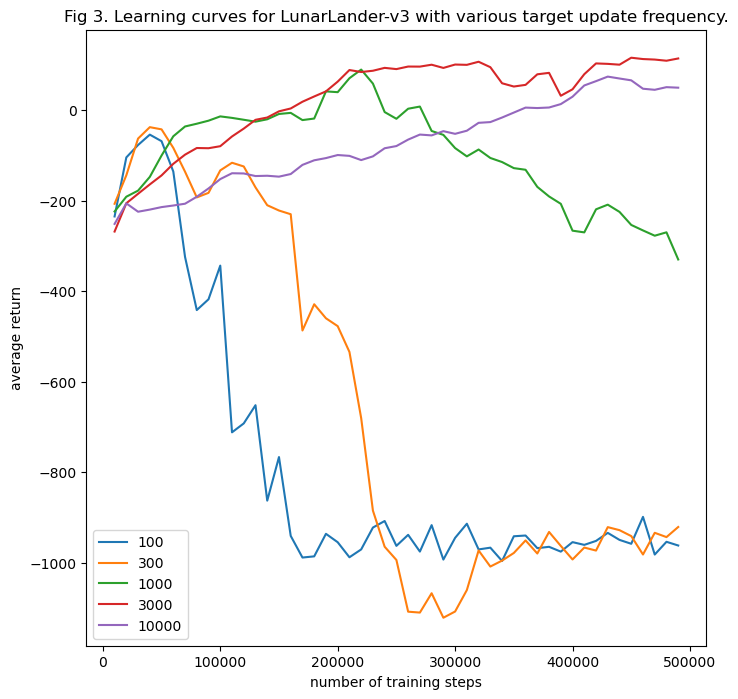

In [25]:
files = ["q3_100_LunarLander-v3_15-10-2022_19-56-32",
"q3_300_LunarLander-v3_15-10-2022_19-41-17",
"q3_1000_LunarLander-v3_15-10-2022_19-43-31",
"q3_3000_LunarLander-v3_15-10-2022_16-43-20",
"q3_10000_LunarLander-v3_15-10-2022_19-43-49"]

ps = [100, 300, 1000, 3000, 10000]
xs = []
ys = []
for file in files:
    df = read_tb(base, file);
    xs.append(get_data_array(df, 'Train_EnvstepsSoFar'))
    ys.append(get_data_array(df, 'Train_AverageReturn'))    
    
plt.figure(figsize=(8, 8))
for i in range(len(ps)):
    plt.plot(xs[i][1:], ys[i], label=ps[i])
plt.xlabel('number of training steps')
plt.ylabel('average return')
plt.legend()
plt.title("Fig 3. Learning curves for LunarLander-v3 with various target update frequency.")
plt.show()

## Part 2: Actor-Critic

### Question 4: Sanity check with Cartpole

Compare the results for the following settings and report which worked best. Do this by plotting all the runs on a single plot and writing your takeaway in the caption.

```bash
python cs285/scripts/run_hw3_actor_critic.py --env_name CartPole-v1 -n 100 -b 1000 --exp_name q4_1_1 -ntu 1 -ngsptu 1
python cs285/scripts/run_hw3_actor_critic.py --env_name CartPole-v1 -n 100 -b 1000 --exp_name q4_100_1 -ntu 100 -ngsptu 1
python cs285/scripts/run_hw3_actor_critic.py --env_name CartPole-v1 -n 100 -b 1000 --exp_name q4_1_100 -ntu 1 -ngsptu 100
python cs285/scripts/run_hw3_actor_critic.py --env_name CartPole-v1 -n 100 -b 1000 --exp_name q4_10_10 -ntu 10 -ngsptu 10
```

The best one uses `-ntu 10 -ngsptu 10`: it reached 200 reward the fastest, and suffered no catastrophic forgetting.

Data put in

```
q4_1_1_CartPole-v1_06-10-2022_12-04-06
q4_100_1_CartPole-v1_06-10-2022_12-04-06
q4_10_10_CartPole-v1_06-10-2022_12-04-06
q4_1_100_CartPole-v1_06-10-2022_12-04-06
```

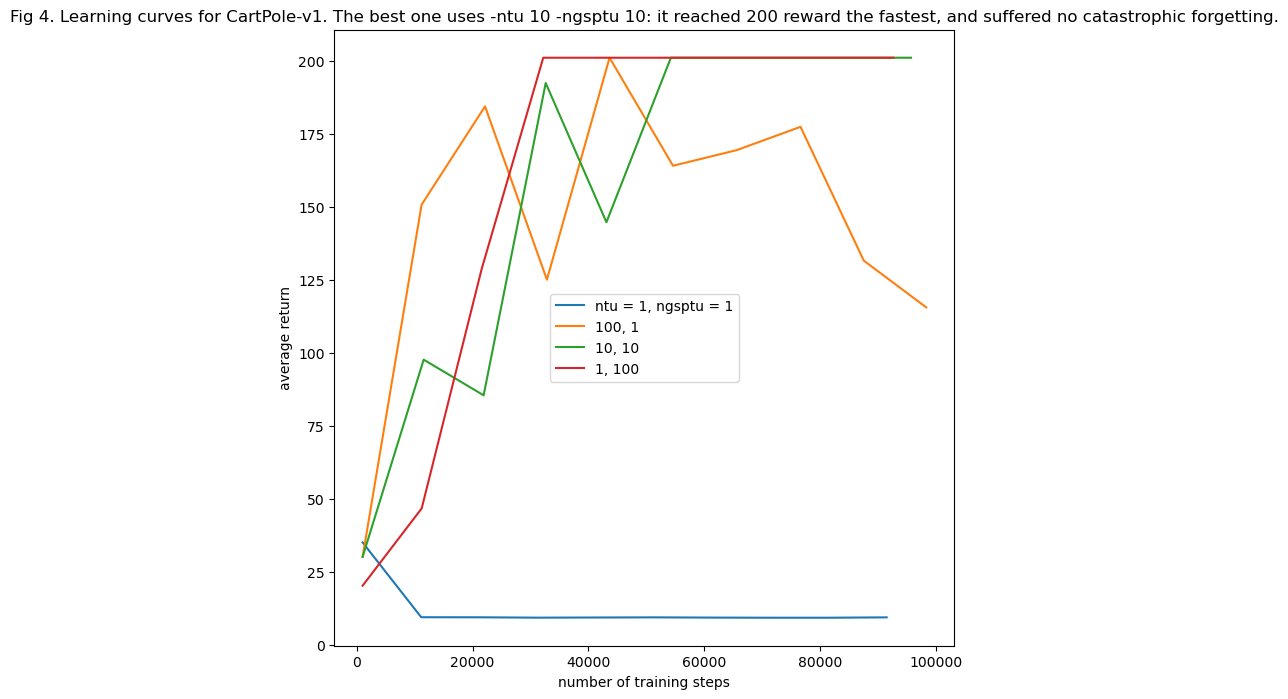

In [21]:
files = ["q4_1_1_CartPole-v1_06-10-2022_12-04-06",
"q4_100_1_CartPole-v1_06-10-2022_12-04-06",
"q4_10_10_CartPole-v1_06-10-2022_12-04-06",
"q4_1_100_CartPole-v1_06-10-2022_12-04-06"]


ps = ["ntu = 1, ngsptu = 1", "100, 1", "10, 10", "1, 100"]
xs = []
ys = []
for file in files:
    df = read_tb(base, file);
    xs.append(get_data_array(df, 'Train_EnvstepsSoFar'))
    ys.append(get_data_array(df, 'Eval_AverageReturn'))
    
plt.figure(figsize=(8, 8))
for i in range(len(ps)):
    plt.plot(xs[i], ys[i], label=ps[i])
# plt.xscale('log')
plt.xlabel('number of training steps')
plt.ylabel('average return')
plt.legend()
plt.title("Fig 4. Learning curves for CartPole-v1. The best one uses -ntu 10 -ngsptu 10: it reached 200 reward the fastest, and suffered no catastrophic forgetting.")
plt.show()


### Question 5: Run actor-critic with more difficult tasks

Use the best setting from the previous question to run InvertedPendulum and HalfCheetah:

```python
import shlex, subprocess

ntu = 10 # number of critic network updates
ngsptu = 10 # number of gradient steps per critic network update

commands = []
commands.append("python cs285/scripts/run_hw3_actor_critic.py --env_name InvertedPendulum-v4 --ep_len 1000 --discount 0.95 -n 100 -l 2 -s 64 -b 5000 -lr 0.01 --exp_name q5_{ntu}_{ngsptu} -ntu {ntu} -ngsptu {ngsptu}".format(ntu=ntu, ngsptu=ngsptu))
commands.append("python cs285/scripts/run_hw3_actor_critic.py --env_name HalfCheetah-v4 --ep_len 150 --discount 0.90 --scalar_log_freq 1 -n 150 -l 2 -s 32 -b 30000 -eb 1500 -lr 0.02 --exp_name q5_{ntu}_{ngsptu} -ntu {ntu} -ngsptu {ngsptu}".format(ntu=ntu, ngsptu=ngsptu))

if __name__ == "__main__":
    for command in commands:
        args = shlex.split(command)
        subprocess.Popen(args)
```

Data put in

```
q5_10_10_InvertedPendulum-v4_06-10-2022_11-59-08
q5_10_10_HalfCheetah-v4_15-10-2022_16-53-26
```

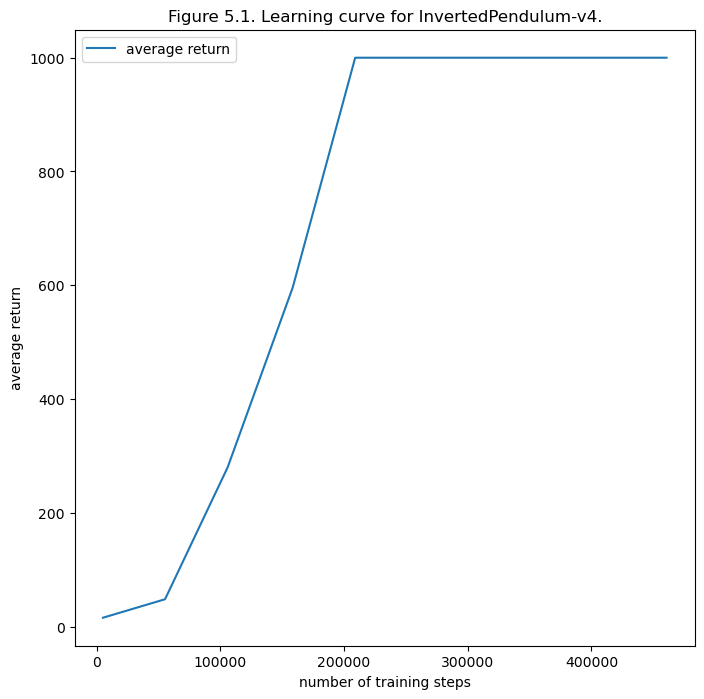

In [20]:
q5_ip = read_tb(base, 'q5_10_10_InvertedPendulum-v4_06-10-2022_11-59-08');

xs = []
ys = []
yerrs = []
for df in [q5_ip]:
    xs.append(get_data_array(df, 'Train_EnvstepsSoFar'))
    ys.append(get_data_array(df, 'Eval_AverageReturn'))
    
plt.figure(figsize=(8, 8))
# plt.errorbar(xs, ys, yerr=yerrs)
plt.plot(xs[0], ys[0], label="average return")
plt.xlabel('number of training steps')
plt.ylabel('average return')
plt.legend()
plt.title("Figure 5.1. Learning curve for InvertedPendulum-v4.")
plt.show()

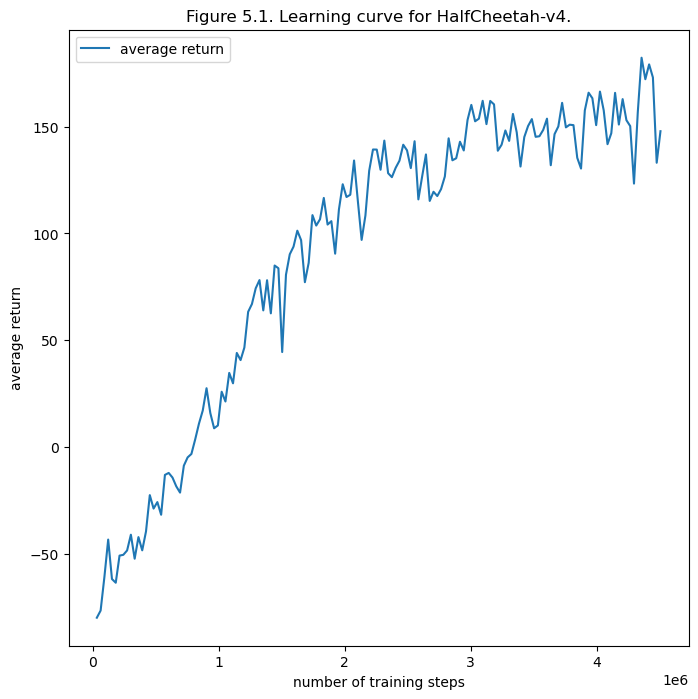

In [19]:
q5_ip = read_tb(base, 'q5_10_10_HalfCheetah-v4_15-10-2022_16-53-26');

xs = []
ys = []
yerrs = []
for df in [q5_ip]:
    xs.append(get_data_array(df, 'Train_EnvstepsSoFar'))
    ys.append(get_data_array(df, 'Eval_AverageReturn'))
    
plt.figure(figsize=(8, 8))
# plt.errorbar(xs, ys, yerr=yerrs)
plt.plot(xs[0], ys[0], label="average return")
plt.xlabel('number of training steps')
plt.ylabel('average return')
plt.legend()
plt.title("Figure 5.1. Learning curve for HalfCheetah-v4.")
plt.show()

## Part 3: Soft Actor-Critic

### Question 6: Run soft actor-critic more difficult tasks

For the Inverted Pendulum, this one worked well enough to pass the autograder:

```
python cs285/scripts/run_hw3_sac.py --env_name InvertedPendulum-v4 --ep_len 1000 --discount 0.99 --scalar_log_freq 1000 -n 100000 -l 2 -s 256 -b 1000 -eb 2000 -lr 3e-5 --init_temperature 0.1 --exp_name q6a_sac_InvertedPendulum_lr3e5 --seed 1
```

Data put in `q6a_sac_InvertedPendulum_lr3e5_InvertedPendulum-v4_17-10-2022_22-47-25`

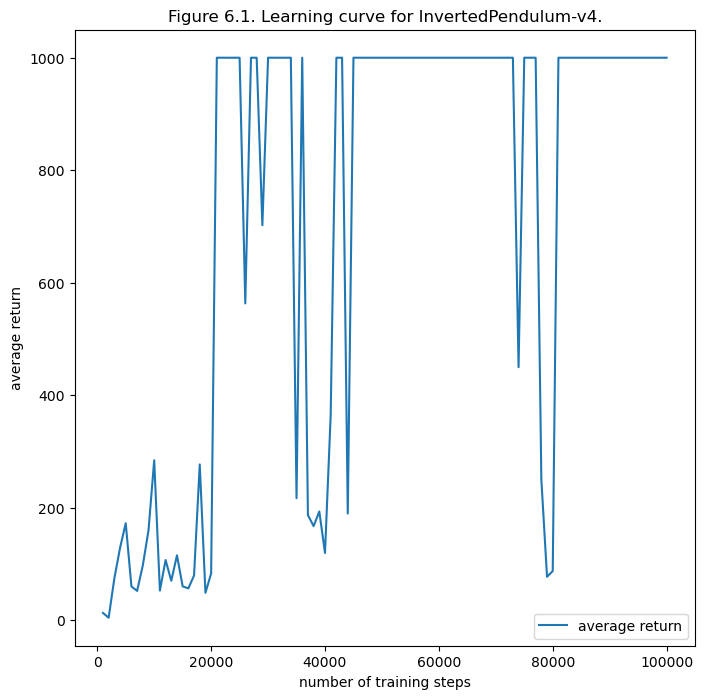

In [28]:
q5_ip = read_tb(base, 'q6a_sac_InvertedPendulum_lr3e5_InvertedPendulum-v4_17-10-2022_22-47-25');

xs = []
ys = []
yerrs = []
for df in [q5_ip]:
    xs.append(get_data_array(df, 'Train_EnvstepsSoFar'))
    ys.append(get_data_array(df, 'Eval_AverageReturn'))
    
plt.figure(figsize=(8, 8))
# plt.errorbar(xs, ys, yerr=yerrs)
plt.plot(xs[0], ys[0], label="average return")
plt.xlabel('number of training steps')
plt.ylabel('average return')
plt.legend()
plt.title("Figure 6.1. Learning curve for InvertedPendulum-v4.")
plt.show()

For HalfCheetah, there is simply nothing I do that could make it pass the autograder. Nothing! I tried grid searching, I went to office hours twice. The Head GSI checked my algorithm on paper and in the code, and said that the logic is sound. I inserted assertions for Torch array shapes at every single place. I tried a clean install of python (this somehow made the program perform *much worse*). It's even impossible to recreate the same run despite using the same command. Nothing worked. So I give up.

Well, after a clean reinstall of the python environment, somehow all the hyperparameters started working differently. One of them *just* barely passed autograder: 

```
python cs285/scripts/run_hw3_sac.py --env_name HalfCheetah-v4 --ep_len 150 --discount 0.99 --scalar_log_freq 1500 -n 200000 -l 2 -s 256 -b 1500 -tb 1500 -eb 1500 -lr 3e-5 --init_temperature 0.1 --exp_name q6b_sac_HalfCheetah_lr3e-5_tb1500 --seed 1
```

Data in `q6b_sac_HalfCheetah_lr3e-5_tb1500_HalfCheetah-v4_18-10-2022_18-50-49`.


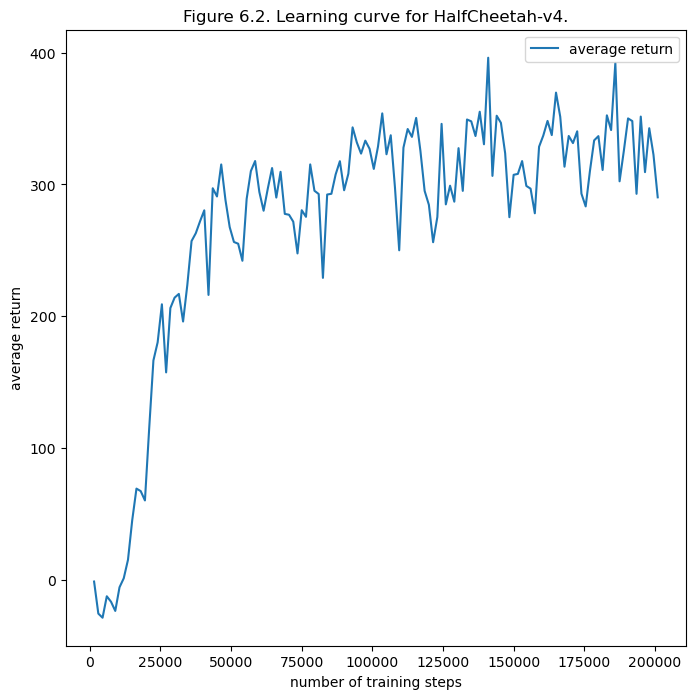

In [32]:
q5_ip = read_tb(base, 'q6b_sac_HalfCheetah_lr3e-5_tb1500_HalfCheetah-v4_18-10-2022_18-50-49');

xs = []
ys = []
yerrs = []
for df in [q5_ip]:
    xs.append(get_data_array(df, 'Train_EnvstepsSoFar'))
    ys.append(get_data_array(df, 'Eval_AverageReturn'))
    
plt.figure(figsize=(8, 8))
# plt.errorbar(xs, ys, yerr=yerrs)
plt.plot(xs[0], ys[0], label="average return")
plt.xlabel('number of training steps')
plt.ylabel('average return')
plt.legend()
plt.title("Figure 6.2. Learning curve for HalfCheetah-v4.")
plt.show()